# Resampling our Dataset
### The data is currently imbalanced. We will be balancing the data here by oversampling and doing classification using the balanced data to reduce bais

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [2]:
movieD = pd.read_csv('Data_Cleaning/allCleanedMovieData.csv')
movieDB = movieD.drop("Unnamed: 0",axis=1)
movieDB.head()

,id,original_title,budget,revenue,release_date,popularity.1,vote_average,runtime,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,percentage_revenue,Won
0,5,Four Rooms,4000000.0,4257354.0,1995.0,22.784,5.744,98.0,32.033857,362.055,36.681,15.715714,225.920,27.939,106.43,False
1,6,Judgment Night,21000000.0,12136938.0,1993.0,11.530,6.543,109.0,14.834857,124.008,23.049,3.600143,32.165,5.436,57.79,False
2,11,Star Wars,11000000.0,775398007.0,1977.0,86.624,8.207,121.0,17.367714,297.868,37.206,7.543000,121.872,10.994,7049.07,True
3,12,Finding Nemo,94000000.0,940335536.0,2003.0,99.340,7.824,100.0,23.006429,467.094,41.251,8.758000,404.117,14.186,1000.36,True
4,13,Forrest Gump,55000000.0,677387716.0,1994.0,68.192,8.481,142.0,32.837571,526.057,99.618,6.422000,224.432,11.735,1231.61,True


Creating DataFrame for chosen Predictors and Response variables

In [7]:
won = pd.DataFrame(movieDB['Won'])
multi = pd.DataFrame(movieDB[['runtime','vote_average','casts_popularity_sum','crews_popularity_sum','release_date']])
print(won.value_counts())

Won  
False    9016
True      596
dtype: int64


Train test split: 80% train, 20% test

In [8]:
x_train,x_test,y_train,y_test = train_test_split(multi,won,test_size=0.2,random_state=42)
y_train.shape

(7689, 1)

In [9]:
y_train.value_counts()

Won  
False    7225
True      464
dtype: int64

As shown from the values above, the data is very imbalanced so there is a need to balance it. 
We have chosen 2 over-sampling methods: RandomOverSampler and SMOTE

RandomOverSampler

In [10]:
ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train,y_train)
print(y_train_res.value_counts())


Won  
False    7225
True     7225
dtype: int64


### Classification using a Decision Tree

Accuracy for train set:  0.993497203797633
Accuracy for test set:  0.8980759230369215
TPR for test:  0.25
TNR for test:  0.9458403126744835


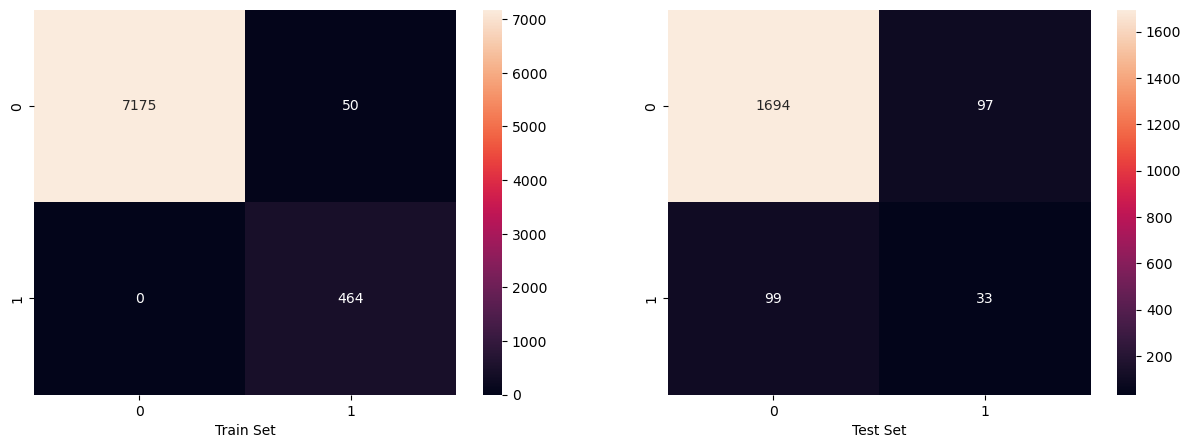

In [11]:
dtree = DecisionTreeClassifier(max_depth=20,random_state=50)
dtree.fit(x_train_res,y_train_res)
train_pred=dtree.predict(x_train)
test_pred = dtree.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt='d',ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",dtree.score(x_train,y_train))
print("Accuracy for test set: ",dtree.score(x_test,y_test))
cm=confusion_matrix(y_test,test_pred)
print("TPR for test: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("TNR for test: ",cm[0][0]/(cm[0][0]+cm[0][1]))


### Classification using K-nearest Neighbors

c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

Accuracy for train set:  0.7561451424112369
Accuracy for test set:  0.7457098283931357
TPR for test:  0.7045454545454546
TNR for test:  0.7487437185929648


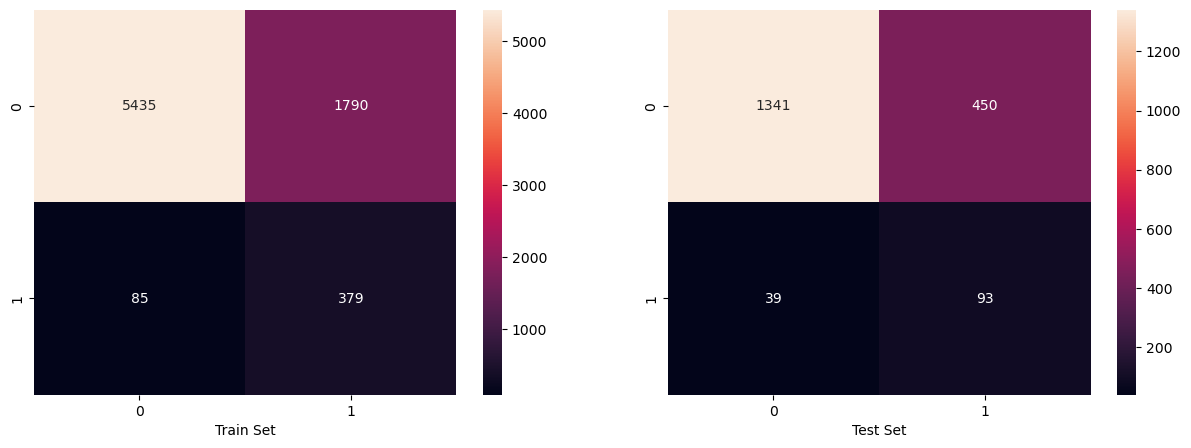

In [12]:
knn = KNeighborsClassifier(n_neighbors = 81)
knn.fit(x_train_res,y_train_res)
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,knn_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,knn_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",knn.score(x_train,y_train))
print("Accuracy for test set: ",knn.score(x_test,y_test))
cm2=confusion_matrix(y_test,knn_test_pred)
print("TPR for test: ",cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("TNR for test: ",cm2[0][0]/(cm2[0][0]+cm2[0][1]))

### Classification using Random Forest

C:\Users\Martin\AppData\Local\Temp\ipykernel_3320\756925530.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_res,y_train_res)


Accuracy for train set:  1.0
Accuracy for test set:  0.9251170046801872
TPR for test:  0.23484848484848486
TNR for test:  0.9759910664433278


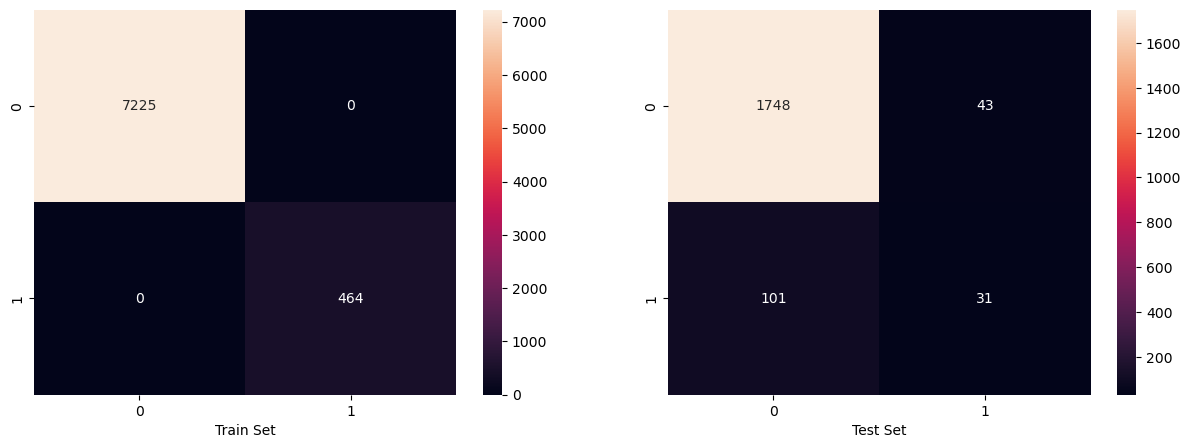

In [13]:
rfc = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 0)
rfc.fit(x_train_res,y_train_res)
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,rfc_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,rfc_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",rfc.score(x_train,y_train))
print("Accuracy for test set: ",rfc.score(x_test,y_test))
cm2=confusion_matrix(y_test,rfc_test_pred)
print("TPR for test: ",cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("TNR for test: ",cm2[0][0]/(cm2[0][0]+cm2[0][1]))

## SMOTE oversampling

In [14]:
sm = SMOTE(random_state=42) 
x_res,y_res = sm.fit_resample(x_train,y_train)
y_res.value_counts()

Won  
False    7225
True     7225
dtype: int64

### Classifying using Decision Tree

Accuracy for train set:  0.9884250227597867
Accuracy for test set:  0.8491939677587104
TPR for test:  0.48484848484848486
TNR for test:  0.8760469011725294


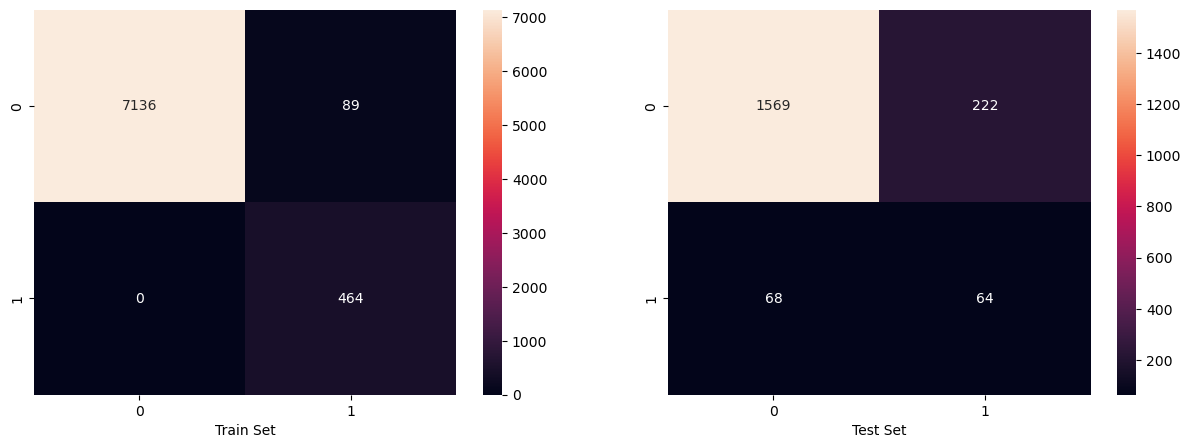

In [15]:
detree = DecisionTreeClassifier(max_depth=20,random_state=50)
detree.fit(x_res,y_res)
train_pred=detree.predict(x_train)
test_pred = detree.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt='d',ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",detree.score(x_train,y_train))
print("Accuracy for test set: ",detree.score(x_test,y_test))
cm3=confusion_matrix(y_test,test_pred)
print("TPR for test: ",cm3[1][1]/(cm3[1][1]+cm3[1][0]))
print("TNR for test: ",cm3[0][0]/(cm3[0][0]+cm3[0][1]))

### Classifying using K-nearest Neighbors

c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

Accuracy for train set:  0.7545844713226687
Accuracy for test set:  0.7394695787831513
TPR for test:  0.7045454545454546
TNR for test:  0.7420435510887772


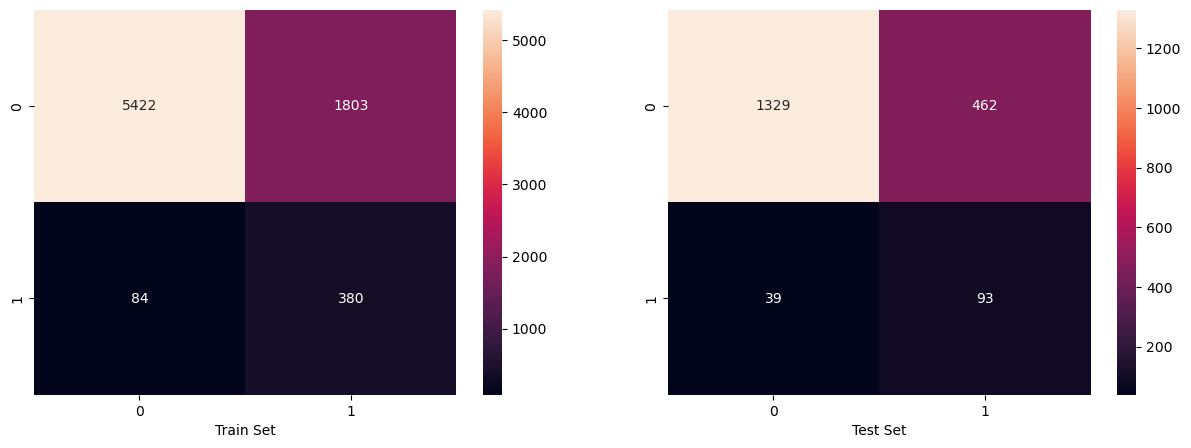

In [16]:
knn = KNeighborsClassifier(n_neighbors = 81)
knn.fit(x_res,y_res)
multi_knn_train_pred = knn.predict(x_train)
multi_knn_test_pred = knn.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,multi_knn_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,multi_knn_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",knn.score(x_train,y_train))
print("Accuracy for test set: ",knn.score(x_test,y_test))
cm4=confusion_matrix(y_test,multi_knn_test_pred)
print("TPR for test: ",cm4[1][1]/(cm4[1][1]+cm4[1][0]))
print("TNR for test: ",cm4[0][0]/(cm4[0][0]+cm4[0][1]))

### Classifying with Random Forest

C:\Users\Martin\AppData\Local\Temp\ipykernel_3320\1730571475.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_res,y_res)


Accuracy for train set:  1.0
Accuracy for test set:  0.8845553822152886
TPR for test:  0.5833333333333334
TNR for test:  0.9067560022333891


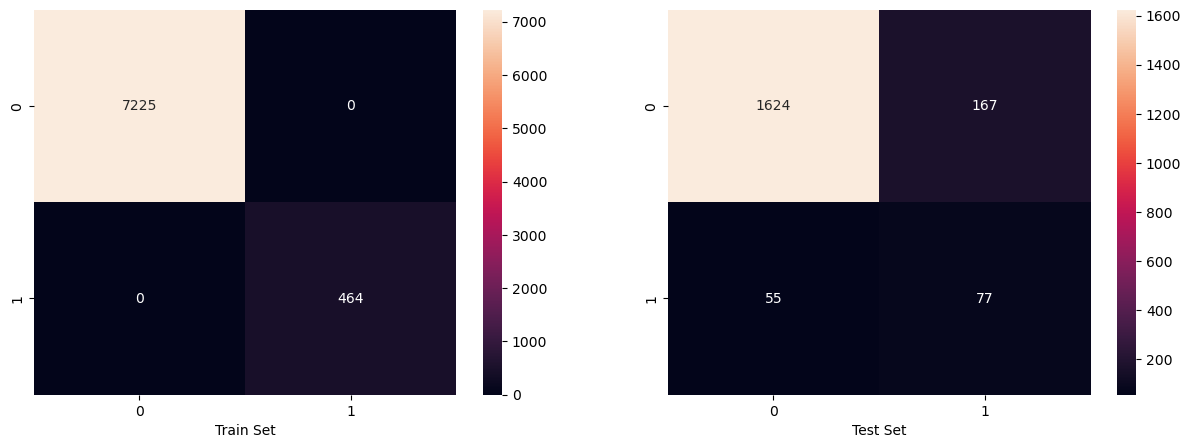

In [17]:
rfc = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 0)
rfc.fit(x_res,y_res)
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,rfc_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,rfc_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",rfc.score(x_train,y_train))
print("Accuracy for test set: ",rfc.score(x_test,y_test))
cm2=confusion_matrix(y_test,rfc_test_pred)
print("TPR for test: ",cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("TNR for test: ",cm2[0][0]/(cm2[0][0]+cm2[0][1]))

## ADASYN Resampling

(14520, 5)
(14520, 1)
Accuracy for train set:  0.9746390948107686
Accuracy for test set:  0.828393135725429
TPR for test:  0.5075757575757576
TNR for test:  0.852037967615857


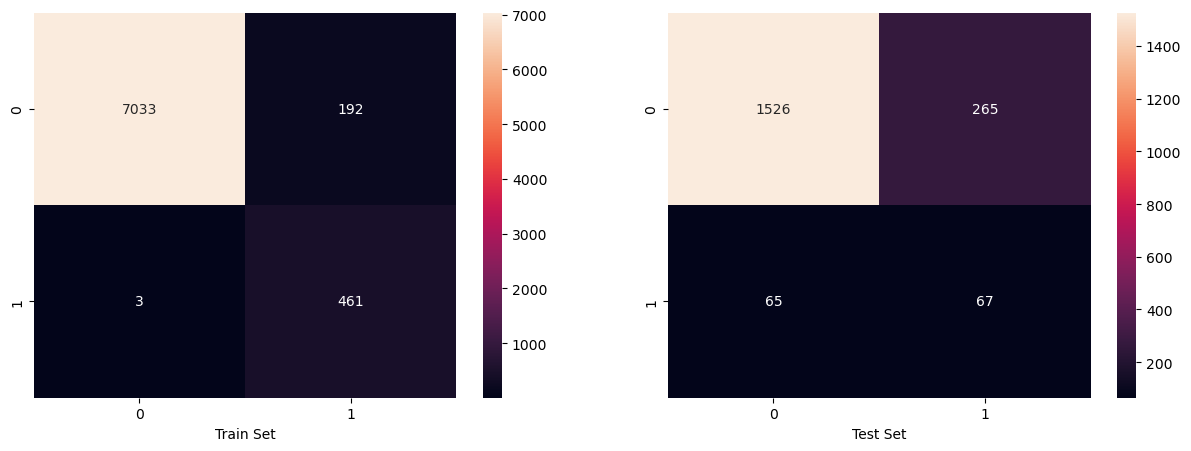

In [21]:
# Training for ADASYN
X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(x_train, y_train)

# Print the shape of the resampled data
print(X_resampled.shape)
print(y_resampled.shape)

# Decision Tree
dectree_ADASYN = DecisionTreeClassifier(max_depth=20,random_state=50)
dectree_ADASYN.fit(X_resampled,y_resampled)
train_pred=dectree_ADASYN.predict(x_train)
test_pred = dectree_ADASYN.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt='d',ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",dectree_ADASYN.score(x_train,y_train))
print("Accuracy for test set: ",dectree_ADASYN.score(x_test,y_test))
cm5=confusion_matrix(y_test,test_pred)
print("TPR for test: ",cm5[1][1]/(cm5[1][1]+cm5[1][0]))
print("TNR for test: ",cm5[0][0]/(cm5[0][0]+cm5[0][1]))



### KNN Model

c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

Accuracy for train set:  0.7281831187410587
Accuracy for test set:  0.7139885595423817
TPR for test:  0.7575757575757576
TNR for test:  0.7107761027359017


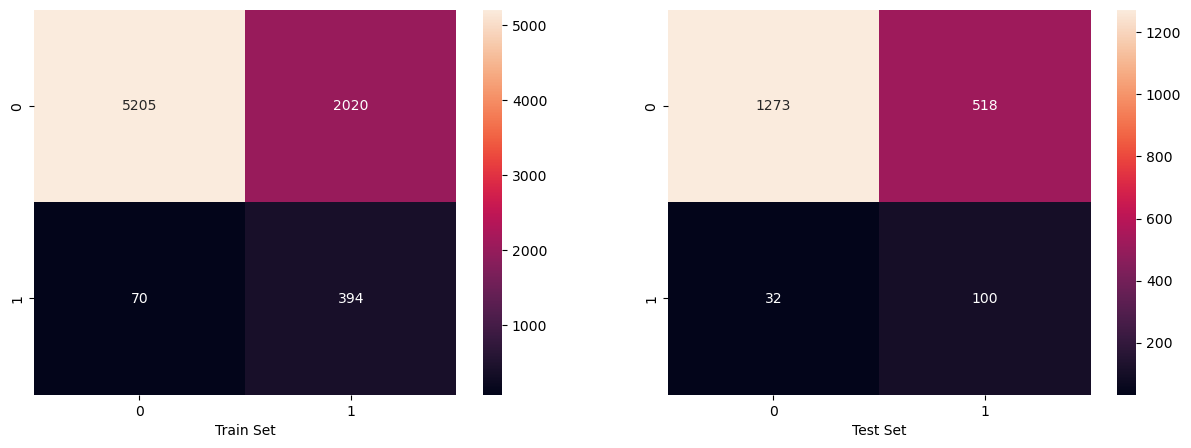

In [22]:
# kNN
knn_ADASYN = KNeighborsClassifier(n_neighbors = 81)
knn_ADASYN.fit(X_resampled,y_resampled)
multi_knn_train_pred = knn_ADASYN.predict(x_train)
multi_knn_test_pred = knn_ADASYN.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,multi_knn_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,multi_knn_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",knn_ADASYN.score(x_train,y_train))
print("Accuracy for test set: ",knn_ADASYN.score(x_test,y_test))
cm6=confusion_matrix(y_test,multi_knn_test_pred)
print("TPR for test: ",cm6[1][1]/(cm6[1][1]+cm6[1][0]))
print("TNR for test: ",cm6[0][0]/(cm6[0][0]+cm6[0][1]))

### Random Forest Model

C:\Users\Martin\AppData\Local\Temp\ipykernel_3320\1535174676.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_ADASYN.fit(X_resampled,y_resampled)


Accuracy for train set:  1.0
Accuracy for test set:  0.8725949037961519
TPR for test:  0.5303030303030303
TNR for test:  0.897822445561139


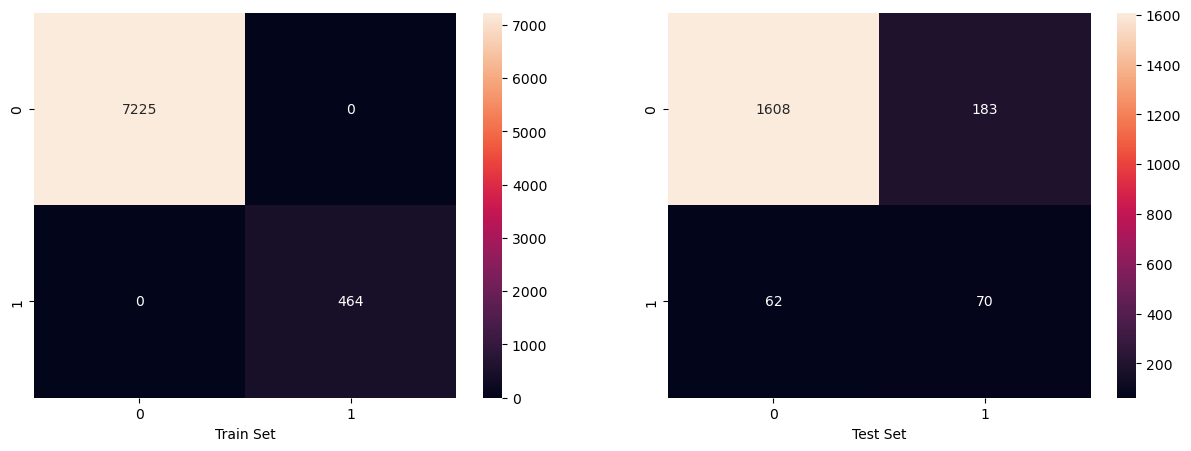

In [23]:
rfc_ADASYN = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 0)
rfc_ADASYN.fit(X_resampled,y_resampled)
multi_rfc_train_pred = rfc_ADASYN.predict(x_train)
multi_rfc_test_pred = rfc_ADASYN.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,multi_rfc_train_pred),annot=True,fmt="d",ax=axes[0])
axes[0].set_xlabel("Train Set")
sb.heatmap(confusion_matrix(y_test,multi_rfc_test_pred),annot=True,fmt="d",ax=axes[1])
axes[1].set_xlabel("Test Set")
print("Accuracy for train set: ",rfc_ADASYN.score(x_train,y_train))
print("Accuracy for test set: ",rfc_ADASYN.score(x_test,y_test))
cm6=confusion_matrix(y_test,multi_rfc_test_pred)
print("TPR for test: ",cm6[1][1]/(cm6[1][1]+cm6[1][0]))
print("TNR for test: ",cm6[0][0]/(cm6[0][0]+cm6[0][1]))

## Conclusion
We can see that with resampling our code, our model accuracy has increased. In this case, the model we should use to predict our oscar winning movies is through KNN. Although the accuracy is not as high as Random Forest, it has higher True positive than random forest. We can conclude a combination of resampling technique (RandomOverSampler) and Model (Random Forest) gives the best overall accuracy but if we are looking at predicting oscar winners, we should use a combination of ADASYN resampling technique and K-Nearest Neighbours model to predict.